In [151]:
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.cluster import KMeans

In [136]:
DATA_FILE_PATH = './Online Retail.xlsx'
df = pd.read_excel(DATA_FILE_PATH, engine='openpyxl')

In [137]:
print('shape: ', df.shape)
print(df.head())  

shape:  (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [138]:
for column in df.columns:
    print(f'Number of NANs in column {column}: ', df[column].isna().sum())

Number of NANs in column InvoiceNo:  0
Number of NANs in column StockCode:  0
Number of NANs in column Description:  1454
Number of NANs in column Quantity:  0
Number of NANs in column InvoiceDate:  0
Number of NANs in column UnitPrice:  0
Number of NANs in column CustomerID:  135080
Number of NANs in column Country:  0


In [139]:
df = df.dropna()
df.shape

(406829, 8)

Calculate time stamp to investigate how recent the purchase is.

In [140]:
df['timestamp'] = [datetime.timestamp(x) for x in df['InvoiceDate']]
print("timestamp =", df['timestamp'].head())

timestamp = 0    1.291188e+09
1    1.291188e+09
2    1.291188e+09
3    1.291188e+09
4    1.291188e+09
Name: timestamp, dtype: float64


In [141]:
df['TotalSpendingPerItemType'] = df['UnitPrice'] * df['Quantity']
print("Total Spending = ", df['TotalSpendingPerItemType'].head())
df['TotalSpending'] = df.groupby('CustomerID')['TotalSpendingPerItemType'].transform('sum')
print("Total Spending = ", df['TotalSpending'].head())
df['InvoicePrice'] = df.groupby('InvoiceNo')['TotalSpendingPerItemType'].transform('sum')
print("Invoice Price = ", df['InvoicePrice'].head())
df['NumberOfTransactions'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
print("Number Of Transactions = ", df['NumberOfTransactions'].head())
df['AveragePurchaseValue'] = df['TotalSpending'] / df['NumberOfTransactions']
print("Average of Purchase = ", df['AveragePurchaseValue'].head())
df['TotalQuantityPurchased'] = df.groupby('CustomerID')['Quantity'].transform('sum')
print("Total Quantity Purchased = ", df['TotalQuantityPurchased'].head())
df['MaxInterval'] = df.groupby('CustomerID')['timestamp'].transform('max') - df.groupby('CustomerID')['timestamp'].transform('min')
print("Max Interval between Purchases = ", df['MaxInterval'].head())
df['FrequencyInverse'] = df['MaxInterval'] / df['NumberOfTransactions']
print("Frequency Inverse = ", df['FrequencyInverse'].head())
df['TimestampShifted'] = df['timestamp']-df['timestamp'].min()
print("Timestamp Shifted = ", df['TimestampShifted'].head())
df['TimestampShifted'].unique()

Total Spending =  0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSpendingPerItemType, dtype: float64
Total Spending =  0    5288.63
1    5288.63
2    5288.63
3    5288.63
4    5288.63
Name: TotalSpending, dtype: float64
Invoice Price =  0    139.12
1    139.12
2    139.12
3    139.12
4    139.12
Name: InvoicePrice, dtype: float64
Number Of Transactions =  0    35
1    35
2    35
3    35
4    35
Name: NumberOfTransactions, dtype: int64
Average of Purchase =  0    151.103714
1    151.103714
2    151.103714
3    151.103714
4    151.103714
Name: AveragePurchaseValue, dtype: float64
Total Quantity Purchased =  0    1693
1    1693
2    1693
3    1693
4    1693
Name: TotalQuantityPurchased, dtype: int64
Max Interval between Purchases =  0    6156720.0
1    6156720.0
2    6156720.0
3    6156720.0
4    6156720.0
Name: MaxInterval, dtype: float64
Frequency Inverse =  0    175906.285714
1    175906.285714
2    175906.285714
3    175906.285714
4    175906.285714
Name: FrequencyI

array([0.000000e+00, 1.200000e+02, 4.800000e+02, ..., 3.224190e+07,
       3.224298e+07, 3.224304e+07])

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,timestamp,TotalSpendingPerItemType,TotalSpending,InvoicePrice,NumberOfTransactions,AveragePurchaseValue,TotalQuantityPurchased,MaxInterval,Frequency,TimestampShifted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.291188e+09,15.30,5288.63,139.12,35,151.103714,1693,6156720.0,0.000006,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291188e+09,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,0.000006,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.291188e+09,22.00,5288.63,139.12,35,151.103714,1693,6156720.0,0.000006,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291188e+09,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,0.000006,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.291188e+09,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,0.000006,0.0


In [107]:
numeric_columns = ['Quantity', 'UnitPrice', 'TotalSpendingPerItemType', 'TotalSpending', 'InvoicePrice', 'TimestampShifted', 'NumberOfTransactions', 'AveragePurchaseValue', 'TotalQuantityPurchased', 'MaxInterval', 'Frequency', 'TimestampShifted']

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    upper_array = np.where(df[column] >= upper)[0]
    lower_array = np.where(df[column] <= lower)[0]
    upper_array = [idx for idx in upper_array if idx in df.index]
    lower_array = [idx for idx in lower_array if idx in df.index]
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    print(df.shape)

(273487, 18)
(269395, 18)
(266459, 18)
(254507, 18)
(245555, 18)
(245555, 18)
(230898, 18)
(221868, 18)
(212854, 18)
(212854, 18)
(180873, 18)
(180873, 18)


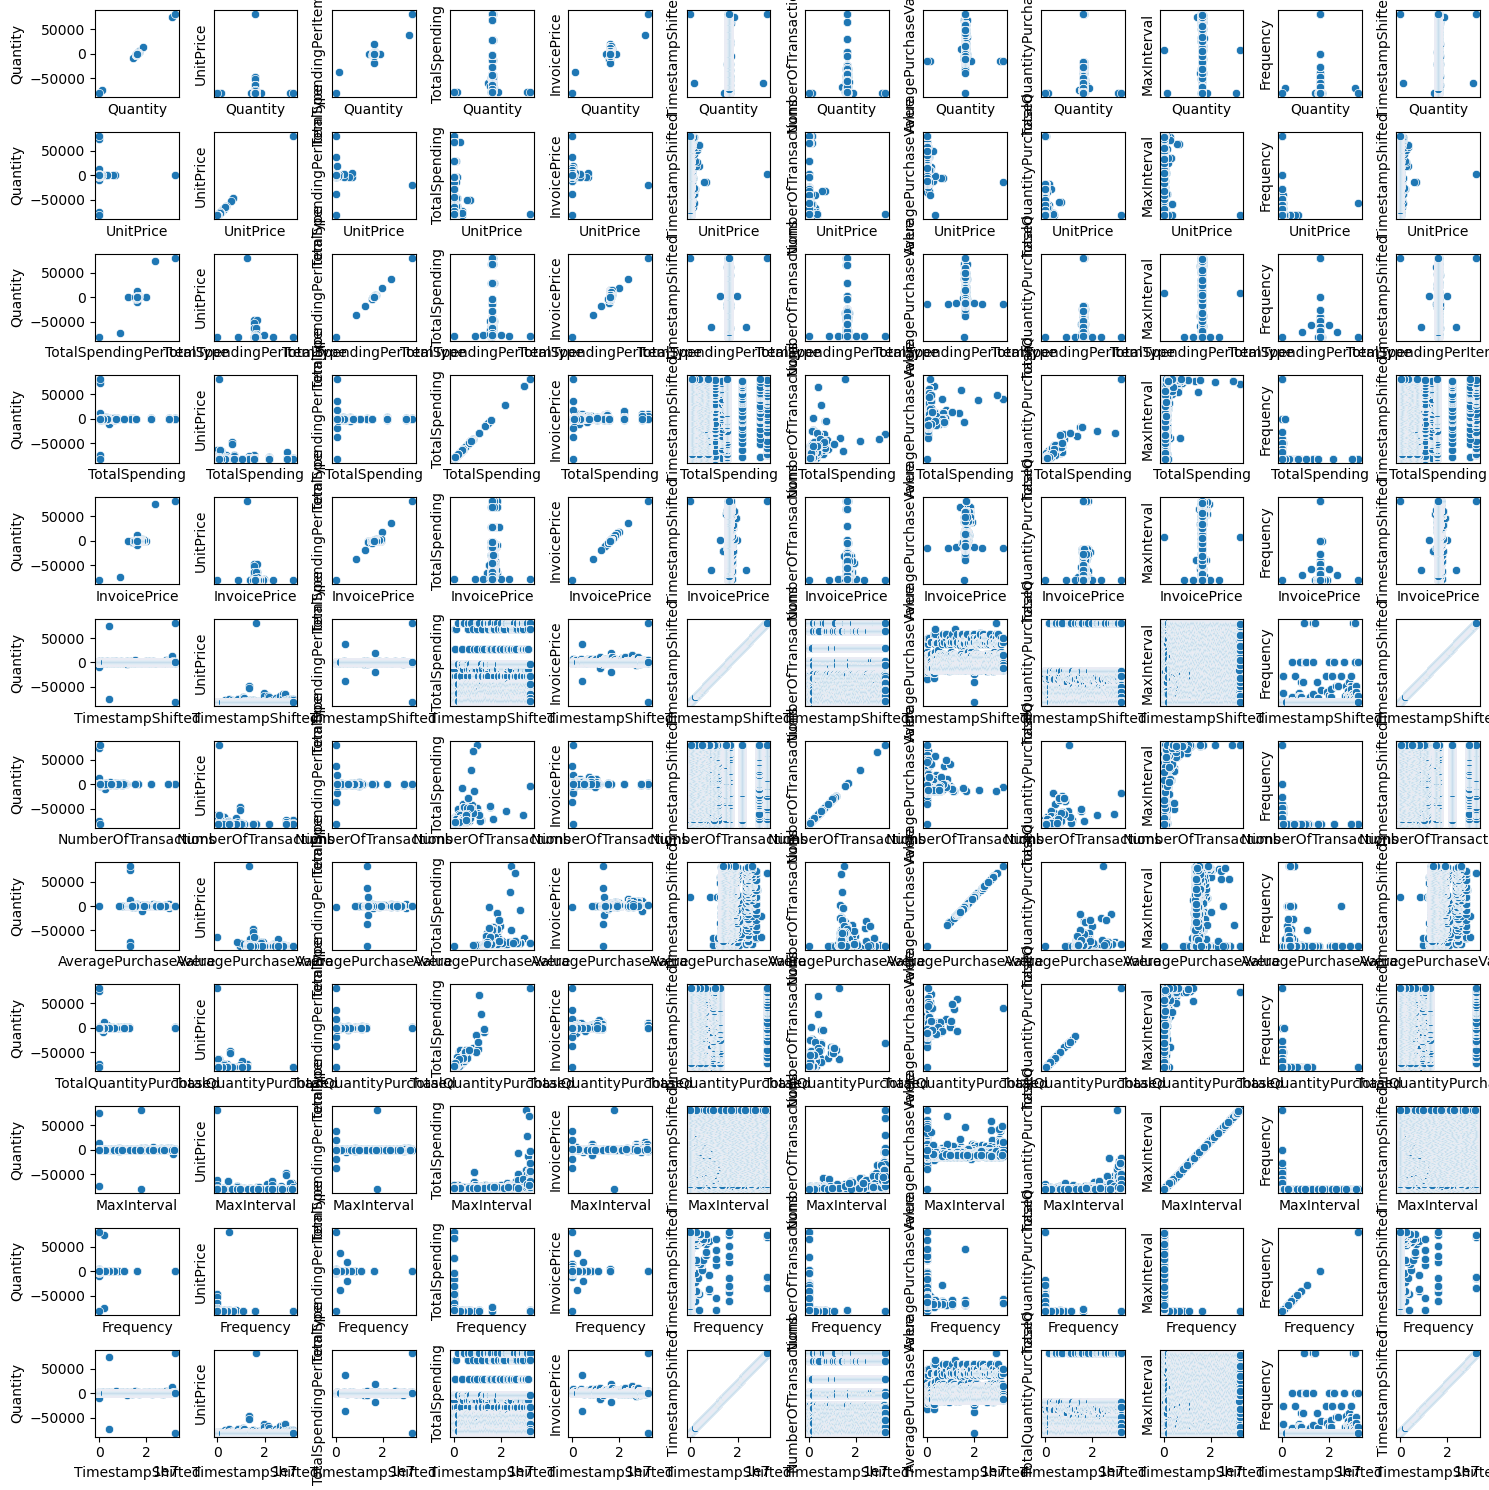

In [125]:
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(15, 15))

# Iterate over the DataFrame columns to plot each pair
for i, x_col in enumerate(numeric_columns):
    for j, y_col in enumerate(numeric_columns):
        ax = axes[i, j]
        sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        if i != num_cols - 1:
            ax.set_xticks([])
        if j != 0:
            ax.set_yticks([])

plt.tight_layout()
plt.show()

In [142]:
df_reduced = df.drop(columns=['InvoiceDate', 'Description', 'CustomerID', 'StockCode', 'timestamp', 'InvoiceNo'])
df_reduced.head()

,Quantity,UnitPrice,Country,TotalSpendingPerItemType,TotalSpending,InvoicePrice,NumberOfTransactions,AveragePurchaseValue,TotalQuantityPurchased,MaxInterval,FrequencyInverse,TimestampShifted
0,6,2.55,United Kingdom,15.30,5288.63,139.12,35,151.103714,1693,6156720.0,175906.285714,0.0
1,6,3.39,United Kingdom,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,175906.285714,0.0
2,8,2.75,United Kingdom,22.00,5288.63,139.12,35,151.103714,1693,6156720.0,175906.285714,0.0
3,6,3.39,United Kingdom,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,175906.285714,0.0
4,6,3.39,United Kingdom,20.34,5288.63,139.12,35,151.103714,1693,6156720.0,175906.285714,0.0


In [143]:
def one_hot_encode(df, column_name):
    if column_name in df.columns:

        df_encoded = pd.get_dummies(df[column_name], prefix=column_name, dtype=int)

        df.drop(column_name, axis=1, inplace=True)

        df = pd.concat([df, df_encoded], axis=1)

        print("One-hot encoding applied to column ", column_name, " successfully.")

        return df

# df = one_hot_encode(df, 'StockCode')
df_encoded = one_hot_encode(df_reduced, 'Country')


One-hot encoding applied to column  Country  successfully.


In [111]:
# df['Canceled'] = df['InvoiceNo'].apply(lambda x: 0 if str(x).startswith('63') else 1)
# df[df['Canceled'] == 0]
df_encoded.head()

,Quantity,UnitPrice,TotalSpendingPerItemType,TotalSpending,InvoicePrice,NumberOfTransactions,AveragePurchaseValue,TotalQuantityPurchased,MaxInterval,Frequency,...,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_Unspecified
10,6,2.10,12.6,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,1,0
11,6,2.10,12.6,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,1,0
12,8,3.75,30.0,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,1,0
13,6,1.65,9.9,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,1,0
14,6,4.25,25.5,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,1,0


In [144]:
df_encoded = df_encoded.drop(columns=['Country_Unspecified'])

In [145]:
dim_red = PCA()
x_pca = dim_red.fit_transform(df_encoded)
print('dim red components: ', dim_red.components_)
print('Variance ratio: ', dim_red.explained_variance_ratio_)
print('Features Names: ', dim_red.get_feature_names_out())

dim red components:  [[-1.69585281e-07  1.71531440e-08 -3.42630690e-07 ...  1.18894084e-10
   2.08432796e-11  8.43632408e-10]
 [-9.68154105e-08  3.53514269e-08 -1.79423466e-07 ...  2.60394777e-11
   2.42330898e-11  4.03569614e-10]
 [-1.11902365e-06 -1.52009599e-07 -2.08733740e-06 ... -1.61645888e-10
  -3.90162255e-11  9.29855155e-09]
 ...
 [-1.11972176e-08  5.55529798e-08  4.84857721e-09 ... -3.94436636e-02
  -5.02610184e-02 -3.72926493e-02]
 [-2.78048905e-08  7.37747325e-08  2.88222607e-08 ... -5.67473942e-02
  -6.49714358e-02 -5.48864779e-02]
 [ 3.59288173e-08 -9.60800387e-08 -2.77769738e-08 ...  1.49402610e-01
   1.60998193e-01  1.46532938e-01]]
Variance ratio:  [5.90633392e-01 3.87382181e-01 2.19795738e-02 4.75865169e-06
 8.50790021e-08 7.84285585e-09 9.74241749e-10 3.86361486e-10
 3.89099536e-11 1.76027973e-11 3.75134781e-12 4.43164006e-16
 1.01010289e-16 6.23735127e-17 3.83386768e-17 2.61024310e-17
 2.12504937e-17 1.83714545e-17 1.41851853e-17 1.30476723e-17
 1.05749202e-17 8.797

In [114]:
df_encoded.head()

,Quantity,UnitPrice,TotalSpendingPerItemType,TotalSpending,InvoicePrice,NumberOfTransactions,AveragePurchaseValue,TotalQuantityPurchased,MaxInterval,Frequency,...,Country_Japan,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom
10,6,2.10,12.6,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,0,1
11,6,2.10,12.6,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,0,1
12,8,3.75,30.0,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,0,1
13,6,1.65,9.9,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,0,1
14,6,4.25,25.5,3079.1,278.73,18,171.061111,1355,29561760.0,6.088947e-07,...,0,0,0,0,0,0,0,0,0,1


In [178]:
training_features = ['pca0' ,'pca1', 'pca2']
df_pca = pd.DataFrame(x_pca, columns=dim_red.get_feature_names_out())
print(df_pca.shape)

(406829, 47)


In [179]:
df_pca_working_set = df_pca[training_features]
df_pca_working_set = df_pca_working_set.reset_index(drop=True)
df_pca_working_set.head()

,pca0,pca1,pca2
0,3.814513e+06,2.391961e+07,-1.881613e+06
1,3.814513e+06,2.391961e+07,-1.881613e+06
2,3.814513e+06,2.391961e+07,-1.881613e+06
3,3.814513e+06,2.391961e+07,-1.881613e+06
4,3.814513e+06,2.391961e+07,-1.881613e+06


<Axes: xlabel='pca0', ylabel='pca1'>

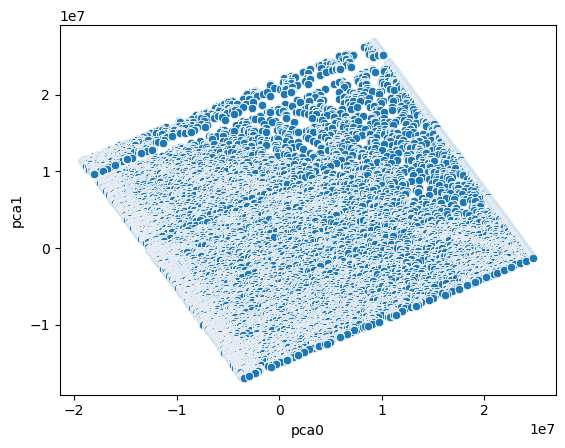

In [180]:
sns.scatterplot(data= df_pca_working_set ,x='pca0', y='pca1')

Centroids:
 [[-0.51767241 -0.20653757  0.07947247]
 [ 1.3179138   0.52581268 -0.2023246 ]]
Distortion: 1.3233028632339192


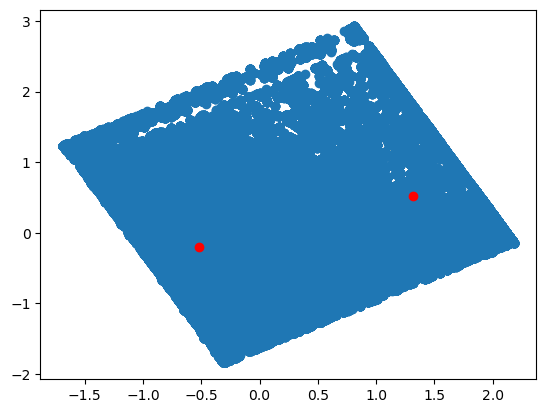

In [189]:
from scipy.cluster.vq import vq, kmeans, whiten

whitened = whiten(df_pca_working_set.values)

book = np.array((whitened[0],whitened[300000]))

codebook, distortion = kmeans(whitened, 2)

print("Centroids:\n", codebook)
print("Distortion:", distortion)
plt.scatter(whitened[:, 0], whitened[:, 1])

plt.scatter(codebook[:, 0], codebook[:, 1], c='r')

plt.show()
# mat = df_pca.values
# # Using sklearn
# km = KMeans(n_clusters=2, random_state=42)
# km.fit(mat)
# # Get cluster assignment labels
# labels = km.labels_
# # Format results as a DataFrame
# results = pd.DataFrame([df_pca.index,labels]).T